In [1]:
%matplotlib notebook
import control as c
import ipywidgets as w
import numpy as np

from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation

display(HTML('<script> $(document).ready(function() { $("div.input").hide(); }); </script>'))

## Átviteli függvények

A következő példa bemutatja, hogyan határozható meg egy rendszer átviteli függvénye. Számos tudományterületen alkalmaznak átviteli függvényeket, értelemszerűen különböző jelentésben. Esetünkben, irányítástechnikai értelemben, kifejezetten a lineáris időinvariáns (LTI) rendszerek frekvencia átviteli karakterisztikáját leíró függvényeket hívjuk átviteli függvényeknek.

Egy rendszer átvileti függvénye a bemeneti $u(t)$ és kimeneti $y(t)$ jelek Laplace transzformáltjai közti kapcsolatot írja le:

$$U(s)=\mathcal{L}\{u(t)\} \quad Y(s)=\mathcal{L}\{y(t)\}$$

$$Y(s)=G(s)U(s)$$

<img src="Images/tf.png" width="30%" />

Lineáris időinvariáns rendszerek esetében az átviteli függvény két polinom hányadosaként megadható:

$$G(s)=\frac{\sum\limits_{j=0}^{m}b_js^j}{\sum\limits_{i=0}^{n}a_is^i},$$

ahol a nevező $a(s)$ a rendszer karakterisztikus polinomja.
<br>Általában a nevező normalizált a legnagyobb fokó tagra: $a_n=1$, ekkor:

$$a(s) = s^n + a_{n-1}s^{n-1} + a_{n-2}s^{n-2} + ... + a_1s^1 + a_0$$
$$b(s) = b_ms^m + b_{m-1}s^{m-1} + b_{m-2}s^{m-2} + ... + b_1s^1 + b_0$$

Valós rendszerekre általánosan igaz, hogy a nevező fokszáma nagyobb, mint a számlálóé; ezeket az átviteli függvényeket szigorúan szabályosnak nevezik. Ebben az esetben a frekvencia átvitel a végtelenben nullához tart.

<br><b>Állítson össze egy átviteli függvényt a polinom együtthatók megválasztásával!</b>

In [2]:
b = {}
a = {}

b[0] = w.FloatText(value=1.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
b[1] = w.FloatText(value=1.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
b[2] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
b[3] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
b[4] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))

a[0] = w.FloatText(value=10.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
a[1] = w.FloatText(value=1.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
a[2] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
a[3] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
a[4] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))
a[5] = w.FloatText(value=0.0, description='', disabled=False, step=0.1, layout=w.Layout(width='11%'))

def transfer_function(a0, a1, a2, a3, a4, a5, b0, b1, b2, b3, b4):

    b1c = b1
    b2c = b2
    b3c = b3
    b4c = b4
    
    global b
    
    if a5 == 0:
        b[4].disabled=True
        b4c = 0
    else:
        b[4].disabled=False
        
    if a5 == 0 and a4==0:
        b[3].disabled=True
        b3c = 0
    else:
        b[3].disabled=False    
        
    if a5 == 0 and a4 == 0 and a3 == 0:
        b[2].disabled=True
        b2c = 0
    else:
        b[2].disabled=False    
        
    if a5 == 0 and a4 == 0 and a3 == 0 and a2 == 0:
        b[1].disabled=True
        b1c = 0
    else:
        b[1].disabled=False   
    
    G = c.tf([b4c, b3c, b2c, b1c, b0], [a5, a4, a3, a2, a1, a0]) # Transfer function

    print('Az átviteli függvény:')
    print(G)

input_data = w.interactive_output(transfer_function, {'a0':a[0], 'a1':a[1], 'a2':a[2], 'a3':a[3], 'a4':a[4], 'a5':a[5],
                                                      'b0':b[0], 'b1':b[1], 'b2':b[2], 'b3':b[3], 'b4':b[4]})

display(w.HBox([w.VBox([w.Label('$G(s)=$')], layout=w.Layout(justify_content="center", align_items='flex-start')),
        w.VBox([w.HBox([b[4], w.Label('$s^4+$'), b[3], w.Label('$s^3+$'), b[2], w.Label('$s^2+$'),
                    b[1], w.Label('$s+$'), b[0]], layout=w.Layout(justify_content='center')),
                    w.HBox([w.HTML(value='<hr style="border-top: 1px solid black">', layout=w.Layout(width='100%'))],
                           layout=w.Layout(justify_content='center')),
                    w.HBox([a[5], w.Label('$s^5+$'), a[4], w.Label('$s^4+$'), a[3], w.Label('$s^3+$'), a[2], w.Label('$s^2+$'),
                    a[1], w.Label('$s+$'), a[0]], layout=w.Layout(justify_content='center')) ],
               layout=w.Layout(width='70%'))], layout=w.Layout(justify_content='center') ), input_data)

Output()

A számláló és nevező polinomok gyökeit rendre a rendszer zérusainak és pólusainak nevezzük. Rajtuk keresztül meghatározható a rendszer stabilitása és dinamikai jellemzői.

A zérusok és pólusok vagy valós számok, vagy pedig komplex konjugált párok (feltéve, hogy a rendszer differenciál egyenletei valós értékűek).

<br><b>Kísérletezzen a rendszer polinom együtthatóival, és figyelje meg a változásokat a pólus-zérus digramon!</b>

<IPython.core.display.Javascript object>


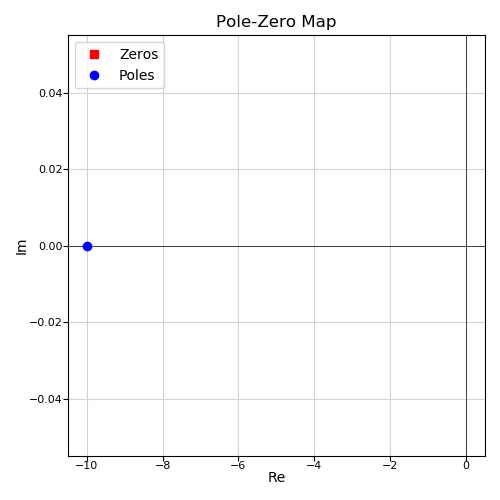

Output()

In [3]:
fig1, (f1_ax1) = plt.subplots(1, 1)
fig1.set_size_inches((5, 5))
fig1.set_tight_layout(True)

f1_line1, = f1_ax1.plot([], [], 'rs')
f1_line2, = f1_ax1.plot([], [], 'bo') 

f1_ax1.axhline(y=0, color='k', lw=0.5)
f1_ax1.axvline(x=0, color='k', lw=0.5)

f1_ax1.grid(which='both', axis='both', color='lightgray')
f1_ax1.autoscale(enable=True, axis='both')

f1_ax1.set_title('Pole-Zero Map', fontsize=12)
f1_ax1.set_xlabel('Re', labelpad=0, fontsize=10)
f1_ax1.set_ylabel('Im', labelpad=0, fontsize=10)
f1_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)

f1_ax1.legend([f1_line1, f1_line2], ['Zeros', 'Poles'])

def pz_map(a0, a1, a2, a3, a4, a5, b0, b1, b2, b3, b4):
    
    b1c = b1
    b2c = b2
    b3c = b3
    b4c = b4
    
    if a5 == 0:
        b4c = 0
        
    if a5 == 0 and a4==0:
        b3c = 0
    
    if a5 == 0 and a4 == 0 and a3 == 0:
        b2c = 0
   
    if a5 == 0 and a4 == 0 and a3 == 0 and a2 == 0:
        b1c = 0

    G = c.tf([b4c, b3c, b2c, b1c, b0], [a5, a4, a3, a2, a1, a0]) # Transfer function
    
    p = c.pole(G)  # Poles
    z = c.zero(G)  # Zeros
    
    px = [x.real for x in p] 
    py = [x.imag for x in p]
    
    zx = [x.real for x in z]
    zy = [x.imag for x in z]
    
    global f1_line1, f1_line2
    
    try:
        f1_ax1.lines.remove(f1_line1)
        f1_ax1.lines.remove(f1_line2)
    except:
        pass
    
    f1_line1, = f1_ax1.plot(zx, zy, 'rs') 
    f1_line2, = f1_ax1.plot(px, py, 'bo')
    
    f1_ax1.relim()
    f1_ax1.autoscale_view()
    
    
    
w.interactive_output(pz_map, {'a0':a[0], 'a1':a[1], 'a2':a[2], 'a3':a[3], 'a4':a[4], 'a5':a[5],
                              'b0':b[0], 'b1':b[1], 'b2':b[2], 'b3':b[3], 'b4':b[4]})

Az időtartományú megfelelője az átviteli függvénynek az impulzus válasz: $g(t)$. Mivel a Dirac-delta függvény Laplace transzformáltja a konstans 1, így egy LTI rendszer átviteli függvénye alapján egyszerűen meghatározható az impulzus válasz.

$$\mathcal{L}\{\delta(t)\} = 1$$

$$1\cdot G(s) \; \xrightarrow{\mathcal{L}^{-1}} \; \delta(t)*g(t)$$

$$Y(s) = G(s)U(s) \; \xrightarrow{\mathcal{L}^{-1}} \; y(t) = \int\limits_{-\infty}^{\infty}g(t-\tau)u(\tau) d\tau,$$

ahol a Laplace transzformáció szabályainak megfelelően az időtartományú konvolúció művelet frekvenciatartományban szorzásnak felel meg, a Dirac-delta függvénnyel történő konvolúció pedig az eredeti függvényt adja eredményül.

<br><b>Figyelje meg az impulzus válasz változását különféle beállítások esetén!</b>

<IPython.core.display.Javascript object>


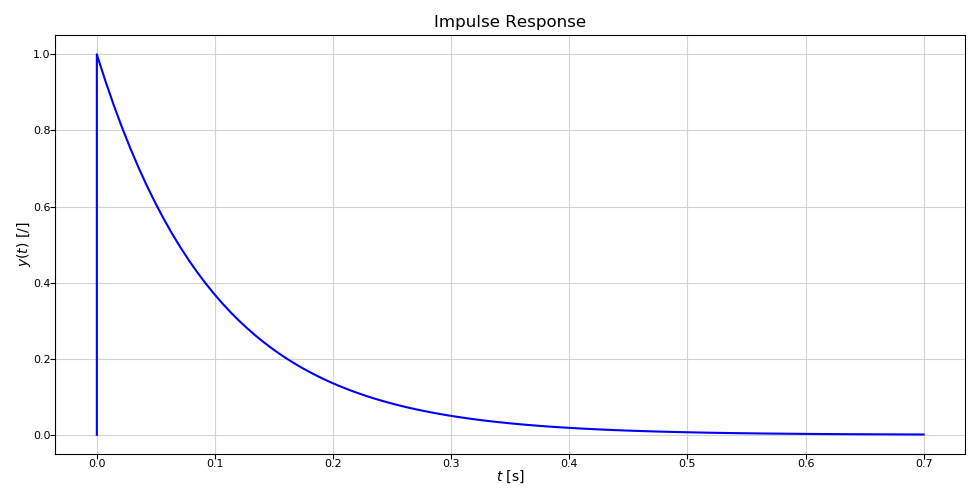

Output()

In [4]:
fig2, (f2_ax1) = plt.subplots(1, 1)
fig2.set_size_inches((9.8, 5))
fig2.set_tight_layout(True)

f2_line1, = f2_ax1.plot([], [])

f2_ax1.grid(which='both', axis='both', color='lightgray')
f2_ax1.autoscale(enable=True, axis='both')

f2_ax1.set_title('Impulse Response', fontsize=12)
f2_ax1.set_xlabel(r'$t$ [s]', labelpad=0, fontsize=10)
f2_ax1.set_ylabel(r'$y(t)$ [/]', labelpad=0, fontsize=10)
f2_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)

def inp_resp(a0, a1, a2, a3, a4, a5, b0, b1, b2, b3, b4):
    
    b1c = b1
    b2c = b2
    b3c = b3
    b4c = b4
    
    if a5 == 0:
        b4c = 0
        
    if a5 == 0 and a4==0:
        b3c = 0
    
    if a5 == 0 and a4 == 0 and a3 == 0:
        b2c = 0
   
    if a5 == 0 and a4 == 0 and a3 == 0 and a2 == 0:
        b1c = 0

    G = c.tf([b4c, b3c, b2c, b1c, b0], [a5, a4, a3, a2, a1, a0]) # Transfer function
    
    tout, yout = c.impulse_response(G)
    
    global f2_line1
    
    try:
        f2_ax1.lines.remove(f2_line1)
    except:
        pass

    f2_line1, = f2_ax1.plot(np.concatenate(([0], tout)), np.concatenate(([0], yout)), '-b') 
    
    f2_ax1.relim()
    f2_ax1.autoscale_view()
    
    
w.interactive_output(inp_resp, {'a0':a[0], 'a1':a[1], 'a2':a[2], 'a3':a[3], 'a4':a[4], 'a5':a[5],
                              'b0':b[0], 'b1':b[1], 'b2':b[2], 'b3':b[3], 'b4':b[4]})